# Chapter1 Review of Neural Network

## 1.1 Math and Python

## 1.2 Prediction of Neural Network

In [6]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.dot(x, W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2

print(s)

[[ 2.10134872 -1.41417644 -1.16212914]
 [ 2.43040025 -1.29084118 -1.66664124]
 [ 2.63500701 -1.4937869  -1.69107609]
 [ 2.37488515 -1.54861461 -1.36167413]
 [ 1.68977795 -0.48500454 -1.26002134]
 [ 2.36920073 -1.55192972 -1.35136696]
 [ 1.03172442  0.87037616 -1.08451248]
 [ 1.88929268 -0.78081083 -1.33039661]
 [ 1.93177135 -1.12932423 -1.15879173]
 [ 0.97835534  0.36948306 -0.83115496]]


In [7]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    

class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

In [8]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x


In [9]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3) # input_size, hidden_size, output_size
s = model.predict(x)
print(s)

[[-1.60663214  1.72760197  1.8463626 ]
 [-1.50555447  1.5165633   1.51227392]
 [-1.39396086  0.85685637  1.09181215]
 [-1.56936315  1.26091425  1.81409576]
 [-1.62468107  1.71787897  1.91875439]
 [-1.53733119  1.53035004  1.69287601]
 [-1.50490494  1.44085546  1.57030694]
 [-1.40561903  0.77334277  1.17102664]
 [-1.4519405   1.13861015  1.36879361]
 [-1.58880335  1.79276497  1.66510344]]


## 1.3 Laerning of Neural Network

### 1.3.1 Loss Function
![img](./fig/1_3_1.drawio.svg)

softmax function is shown as folloing:
$$
    \begin{align}
        y_k &= \frac{\exp(s_k)}{\sum_i^n \exp(s_i)} \\
        L &= -\sum_i^n t_k \log{y_k}
    \end{align}
$$


In [10]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


class SoftmaxWithLoss:
    def __init__(self):
        self.params = []
        self.grads = []
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y
        return dx

### 1.3.2 Differentiation and Gradient


### 1.3.4 Calculation Graph

#### 1.3.4.2 Branch(Copy) Node

The result of Backpropation through a branch copy node is the sum of hte gradients from the branched outputs.
$$
    \frac{\partial L}{\partial x} + \frac{\partial L}{\partial x}
$$

#### 1.3.4.3 Repeat node

Same as branch copy node, the gradient of repeat node is the sum of gradients of the branched outputs.


In [19]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)

dy = np.random.randn(N, D)
dx = np.sum(dy, axis=0, keepdims=True)

print(x)
print(y)
print(dy.shape)
print(dx.shape)



[[ 1.02619179 -0.92312072 -0.4779004   0.5253111   0.8536584  -0.06696377
  -0.01607654 -0.15158129]]
[[ 1.02619179 -0.92312072 -0.4779004   0.5253111   0.8536584  -0.06696377
  -0.01607654 -0.15158129]
 [ 1.02619179 -0.92312072 -0.4779004   0.5253111   0.8536584  -0.06696377
  -0.01607654 -0.15158129]
 [ 1.02619179 -0.92312072 -0.4779004   0.5253111   0.8536584  -0.06696377
  -0.01607654 -0.15158129]
 [ 1.02619179 -0.92312072 -0.4779004   0.5253111   0.8536584  -0.06696377
  -0.01607654 -0.15158129]
 [ 1.02619179 -0.92312072 -0.4779004   0.5253111   0.8536584  -0.06696377
  -0.01607654 -0.15158129]
 [ 1.02619179 -0.92312072 -0.4779004   0.5253111   0.8536584  -0.06696377
  -0.01607654 -0.15158129]
 [ 1.02619179 -0.92312072 -0.4779004   0.5253111   0.8536584  -0.06696377
  -0.01607654 -0.15158129]]
(7, 8)
(1, 8)


#### 1.3.4.4 Merge(Sum) node

Opposite from Repear node, the gradient of merge node is the gradient of the copy of the branched outputs.

In [21]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis=1, keepdims=True)

dy = np.random.randn(1,D)
dx = np.repeat(dy, N, axis=0)

print(x)
print(y)
print(dy)
print(dx)


[[ 0.49861556  0.31578376 -1.42410287 -0.46762021 -0.45315124 -2.17077979
   1.62033403 -0.48322708]
 [-1.196297   -1.05044407 -1.89923202 -0.93230896  0.36980679  0.09410572
  -0.73967384 -1.37502608]
 [-0.08455604  0.12522562  0.60070604  1.31670885 -1.29335691 -0.73639152
   0.77475327 -0.22347416]
 [-0.93464377 -0.43859919  0.10388152 -0.70513299  1.9201208  -0.82267787
   0.63246046 -1.27944173]
 [ 0.73819773  0.41860033  0.69538193 -0.23336224 -0.20851436 -0.68782643
   0.21333413  0.38010639]
 [ 0.6381544  -1.1975144  -0.30493969 -1.07262524 -1.18861292 -0.31850862
   0.66316918 -0.32197068]
 [-0.67054836  1.27205921 -1.9641311  -1.30710033  0.71348014 -2.02280273
   0.34065187  0.45633866]]
[[-2.56414785]
 [-6.72906947]
 [ 0.47961515]
 [-1.52403277]
 [ 1.31591748]
 [-3.10284797]
 [-3.18205263]]
[[ 1.36019755  0.82119234 -1.14269755 -0.61052883  0.10491528 -0.73616304
   0.28239113 -1.68952825]]
[[ 1.36019755  0.82119234 -1.14269755 -0.61052883  0.10491528 -0.73616304
   0.28239

#### 1.3.4.5 Matrix Multiplication node

The gradient of matrix multiplication node is the product of the gradients of the branched outputs and the transposed input.
$$
    \frac{\partial L}{\partial x_i} = \sum_j \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial x} = \sum_j \frac{\partial L}{\partial y_j} W_{ij}
$$



In [22]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx
    

### 1.3.5 Derivation of Gradients and Implementation of Backpropagation

#### 1.3.5.1 Sigmoid Layer

$$
    \frac{\partial L}{\partial x} = y(1-y)
$$

In [ ]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1 - self.out) * self.out
        return dx



#### 1.3.5.2 Affine Layer

Predict result of Affine Luyer is
$$X(N, D) * W(D, H) + b(H) = Y(N, H)$$

Backpropagation is calculated as
$$
    \frac{\partial L}{\partial x} (N,D) = \frac{\partial L}{\partial y} (N,H) * \frac{\partial y}{\partial x} (D,H).T = \frac{\partial L}{\partial y} (N,H) * W.T
$$

In [ ]:
# Affine Class

class Affine:
    def __init__(self, w, b):
        self.params = [w, b]
        self.grads = [np.zeros_like(w), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        w, b = self.params
        out = np.dot(x, w) + b
        self.x = x
        return out
    
    def backward(self, dout):
        w, b = self.params
        dx = np.dot(dout, w.T)
        dw = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dw
        self.grads[1][...] = db
        return dx

#### 1.3.5.3 Softmax with Loss Layer



### 1.3.6 Update weights with Gradient Descent

Weights are updated as

$$
    W_{ij} = W_{ij} - \eta \frac{\partial L}{\partial W_{ij}}
$$

In [23]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]


## 1.4 Solve a Problem with Neural Network

### 1.4.1 spiral dataset


(300, 2)
(300, 3)


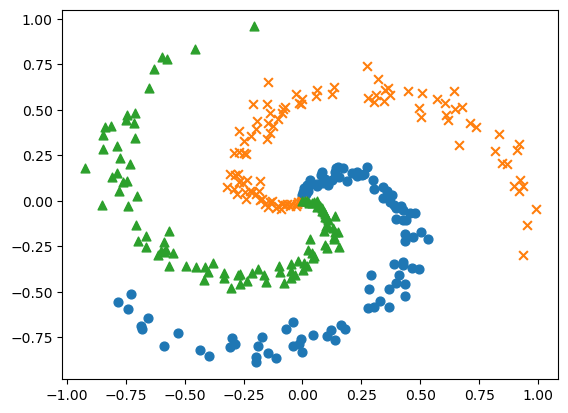

In [35]:
import sys
sys.path.append("../.org/deep-learning-from-scratch-2/")
from dataset import spiral
import numpy as np
import matplotlib.pyplot as plt
import importlib
## needed to modify spiral.py np.int to np.int32


importlib.reload(spiral)

x, t = spiral.load_data()
print(x.shape)
print(t.shape)

# Plot x datas with result label T

N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])

### 1.4.2 implementation of Neural Network

In [36]:
# 1.4.2 implementation of Neural Network

import sys
sys.path.append("../.org/deep-learning-from-scratch-2/")
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # initialize weight and bias
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.random.randn(O)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        y = self.predict(x)
        loss = self.loss_layer.forward(y, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout